In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("renewable_energy_source_dataset.csv")  # replace if different
df.head()


Saving renewable_energy_source_dataset.csv to renewable_energy_source_dataset (1).csv


,Plant ID,Avg Wind Speed (m/s),Solar Irradiance (kW/m^2),Water Flow Rate (L/s),CO2 Emissions (kg),Energy Generated (MW),Temperature (°C),Humidity (%),Source Type
0,P1000,6.490142,4.852355,211.948435,104.485275,72.992869,27.853065,77.311816,Thermal
1,P1001,4.585207,6.818833,173.970695,11.417000,94.219253,29.840923,88.849704,Thermal
2,P1002,6.943066,0.202865,104.770430,0.000000,68.303203,23.343458,38.176959,Thermal
3,P1003,9.569090,4.125938,48.245058,49.763788,87.681539,21.938816,87.880654,Thermal
4,P1004,4.297540,1.698715,155.857865,38.087076,24.255413,19.574247,50.186371,Thermal


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Plant ID                   500 non-null    object 
 1   Avg Wind Speed (m/s)       500 non-null    float64
 2   Solar Irradiance (kW/m^2)  500 non-null    float64
 3   Water Flow Rate (L/s)      500 non-null    float64
 4   CO2 Emissions (kg)         500 non-null    float64
 5   Energy Generated (MW)      500 non-null    float64
 6   Temperature (°C)           500 non-null    float64
 7   Humidity (%)               500 non-null    float64
 8   Source Type                500 non-null    object 
dtypes: float64(7), object(2)
memory usage: 35.3+ KB


,0
Plant ID,0
Avg Wind Speed (m/s),0
Solar Irradiance (kW/m^2),0
Water Flow Rate (L/s),0
CO2 Emissions (kg),0
Energy Generated (MW),0
Temperature (°C),0
Humidity (%),0
Source Type,0


In [4]:
le = LabelEncoder()
df["Source Type"] = le.fit_transform(df["Source Type"])  # e.g., Solar = 2, Wind = 3, etc.
df["Source Type"].value_counts()


,count
Source Type,
2,489
0,6
3,3
1,2


In [5]:
X = df.drop(columns=["Plant ID", "Source Type"])
y = df["Source Type"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

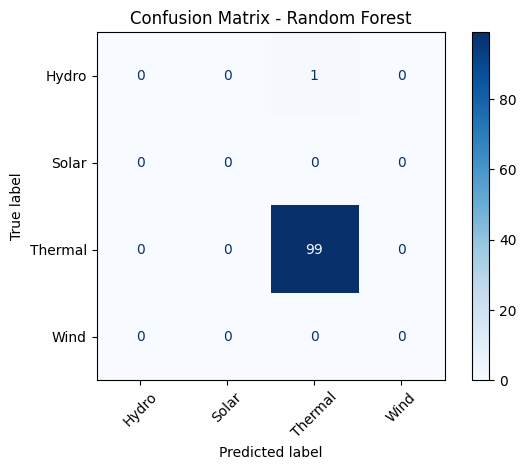

              precision    recall  f1-score   support

       Hydro       0.00      0.00      0.00         1
       Solar       0.00      0.00      0.00         0
     Thermal       0.99      1.00      0.99        99
        Wind       0.00      0.00      0.00         0

    accuracy                           0.99       100
   macro avg       0.25      0.25      0.25       100
weighted avg       0.98      0.99      0.99       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [10]:
y_pred = rf.predict(X_test)

labels = rf.classes_
class_names = le.inverse_transform(labels)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, labels=labels, target_names=class_names))



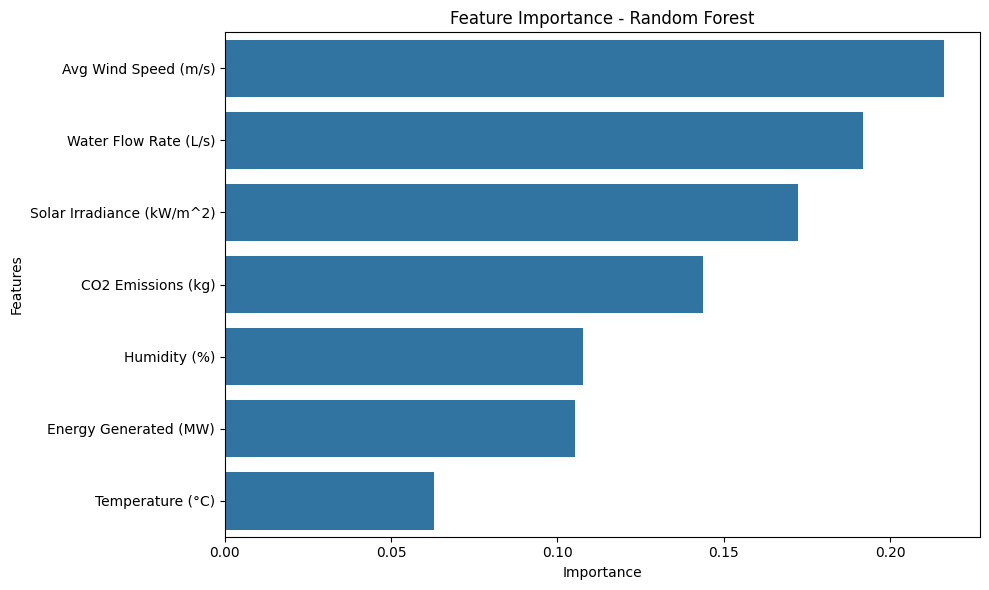

In [11]:
importances = rf.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
